In [1]:
# imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')
import math
import seaborn as sns
from datetime import datetime

In [19]:
df = pd.read_excel('Data/Time Series Data.xlsx', index_col = 'Day')
df = df

In [20]:
# moving average strategy
# ma function

def rolling_averages_inflexions(data, window): 
    # generating simple moving average
    
    # data - is the series to generate signals for
    # window - is the window used to generate the average
    # lag - is how far % past the average before a signal is generated
    
    SMA = data.rolling(window = window).mean()
    gradients = pd.Series(np.gradient(SMA))
    
    # generating signals
    sigPriceBuy = []
    sigPriceSell = []
      
    #flag = 1: long position, flag = 0: short position, flag = -1: no position
    flag = -1
    flag_status = []
    
    for i in range(len(data)):
        flag_status.append(flag)
        
        if i == len(data)-1:
            if flag == 1:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else: 
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 0
                
        elif gradients[i]>0 and gradients[i-1]<0:
            if flag != 1:
                sigPriceBuy.append(data[i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
                
        elif gradients[i]<0 and gradients[i-1]>0:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data[i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else: 
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell, flag_status)
    

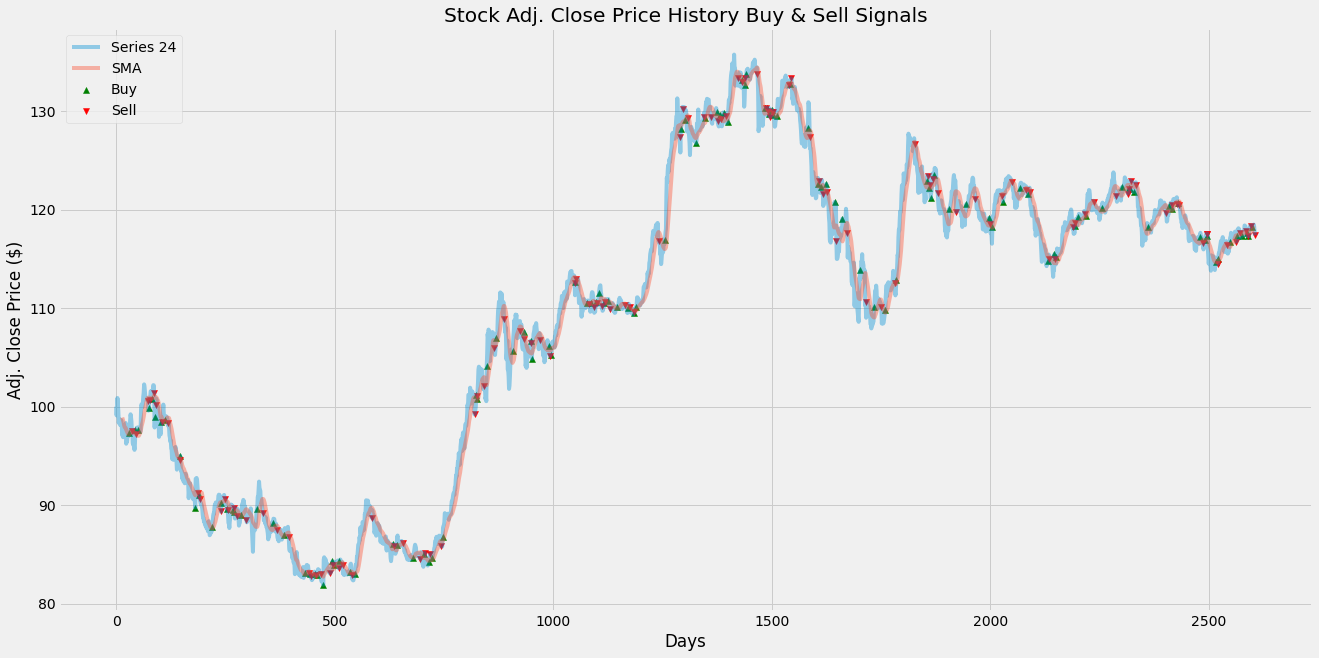

In [21]:
window_test =15
series = 'Series 24'
# =========================================

#Store the buy and sell data into a variable
buy_sell_data_test = rolling_averages_inflexions(df[series], window_test)

# visualise test
plt.figure(figsize=(20, 10))
plt.plot(df[series], label=series, alpha=0.4)
plt.plot(df[series].rolling(window=window_test).mean(), label='SMA', alpha=0.4)
plt.scatter(df.index, buy_sell_data_test[0], label='Buy', marker='^', color='green')
plt.scatter(df.index, buy_sell_data_test[1], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Days')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [22]:
def Backtest(data, buy_sell):
    
    profit = np.nansum(buy_sell[1]) - np.nansum(buy_sell[0])
    data_profit = data.iloc[-1] - data[0]
    rel_profit = profit - data_profit
    
    return rel_profit


In [26]:
def Backtest_2(data, buy_sell_data):
    
    profit = 0
    
    for i in range(1,len(buy_sell_data[2])): 

        if buy_sell_data[2][i]==buy_sell_data[2][i-1]:
            #no change
            pass

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==-1:
            #from nothing to long
            price_bought_at = data[i]
            
        
        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==-1:
            #from nothing to short
            price_shorted_at = data[i]
            

        elif buy_sell_data[2][i] == 0 and buy_sell_data[2][i-1]==1:
            #from long to short
            profit += df[series][i] - price_bought_at
            price_shorted_at = data[i]

        elif buy_sell_data[2][i] == 1 and buy_sell_data[2][i-1]==0:
            #from short to long
            profit += price_shorted_at - df[series][i]  
            price_bought_at = data[i]   

        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==0:
            #from short to nothing
            profit += price_shorted_at - df[series][i]   
            
        elif buy_sell_data[2][i] == -1 and buy_sell_data[2][i-1]==1:
            #from long to nothing
            profit += df[series][i]  - price_bought_at
            
    return profit  

In [32]:
def profit_fct_inflection_points():
    
    """
    parameters that can be modified 
    """
    
    assets = list(df.columns)
    window = 30
    profit = {}
    
    for i in assets:
        profit_on_series = Backtest_2(df[i], rolling_averages_inflexions(df[i], window))
        profit[i]=profit_on_series

    return profit

In [33]:
profit_inflexion = profit_fct_inflection_points()
profit_inflexion

{'Series 1': 440.39420436625693,
 'Series 2': 723.1021052872904,
 'Series 3': 14.56265839356233,
 'Series 4': 184.77156527816993,
 'Series 5': -93.90248854288734,
 'Series 6': 64.06230472151098,
 'Series 7': -41.77683474299158,
 'Series 8': -263.780218489321,
 'Series 9': 227.60086669029658,
 'Series 10': -16.92140509719293,
 'Series 11': -26.508980502730736,
 'Series 12': 134.37437212250308,
 'Series 13': 2916.530765670033,
 'Series 14': 602.4768830634312,
 'Series 15': 28.986607862827555,
 'Series 16': 85.83531491708224,
 'Series 17': -47.94313553371016,
 'Series 18': -40.490558007026024,
 'Series 19': -62.27272767053594,
 'Series 20': 36.15572574216091,
 'Series 21': 19.616394282018774,
 'Series 22': -16.49376798081471,
 'Series 23': -12.540374389892463,
 'Series 24': -10.64094249891977,
 'Series 25': 54.67817623748843,
 'Series 26': 25.88561854209628,
 'Series 27': 11.145352857376523,
 'Series 28': -609.6410680584356,
 'Series 29': 41.50460974390888}